***Computer***: Visualize the associated Legendre functions $P_{ℓ}^{m}$ for $ℓ=0$ and $ℓ=1$ in analogy to Table 4.2b.

What do these visualizations tell us about the corresponding spherical harmonics $Y_{ℓ}^{m}$ (would they differ?)

Associated Legendre Functions are defined as:

$P^{m}_{ℓ}(cosθ)$ = $(-1)^m(1-x^2)^{\frac{m}{2}}(\frac{d}{dx})^m P_ℓ(x)$

and $P_ℓ(x)$ is the $ℓ$th Legendre polynomial, defined by Rodrigues formula:

$P_ℓ(x) ≡ \frac{1}{2^{ℓ}ℓ!}(\frac{d}{dx})^ℓ(x^2 - 1)^ℓ$

where ℓ ∈ $\mathbb{W}$ and $m$ = -ℓ, ℓ + 1, ⋯ , ℓ - 1, ℓ. (Other possible notation: $m$ ∈ $[-ℓ,ℓ]$ ???)

m for l = 0: 0
m for l = 1: [0 1]
m for l = 2: [0 1 2]

@ l = 0
Legendre Polynomial Expression : 1.00000000000000
Sign at m = 0 was: 1
Legendre Function Expression : 1.00000000000000

@ l = 1
@ m[0][0] = 0
Legendre Polynomial Expression : 1.0*x
Sign at m = 0 was: 1
Legendre Function Expression : 1.0*x

@ l = 1
@ m[0][1] = 1
Legendre Polynomial Expression : 1.0*x
Sign at m = 1 was: -1
Legendre Function Expression : -1.0*x*(1 - x**2)**0.5

@ l = 2
@ m[1][0] = 0
Legendre Polynomial Expression : 1.5*x**2 - 0.5
Sign at m = 0 was: 1
Legendre Function Expression : 1.5*x**2 - 0.5

@ l = 2
@ m[1][1] = 1
Legendre Polynomial Expression : 1.5*x**2 - 0.5
Sign at m = 1 was: -1
Legendre Function Expression : -(1 - x**2)**0.5*(1.5*x**2 - 0.5)

@ l = 2
@ m[1][2] = 2
Legendre Polynomial Expression : 1.5*x**2 - 0.5
Sign at m = 2 was: 1
Legendre Function Expression : (1 - x**2)**1.0*(1.5*x**2 - 0.5)

@ l = 3
@ m[2][0] = 0
Legendre Polynomial Expression : 0.5*x*(5*x**2 - 3)
Sign at m = 0 was: 1
Legendre Fu

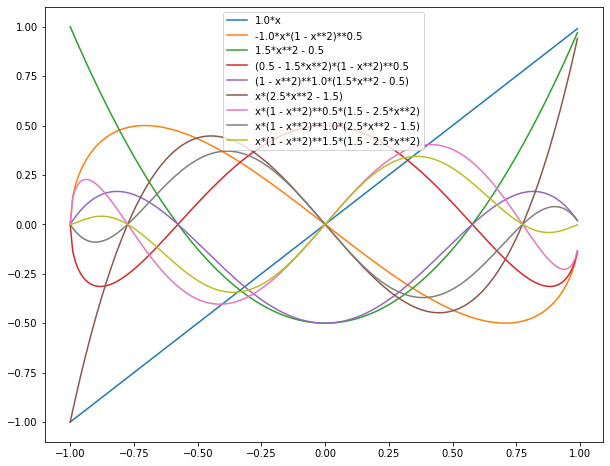

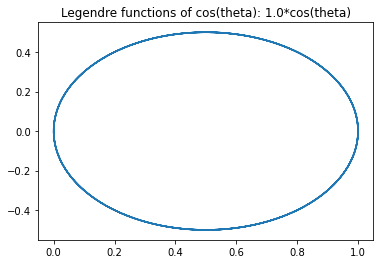

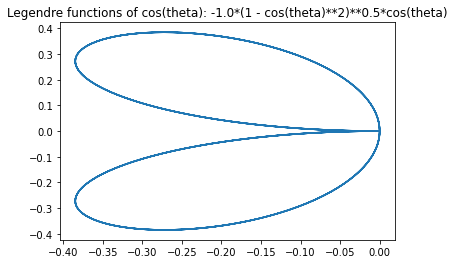

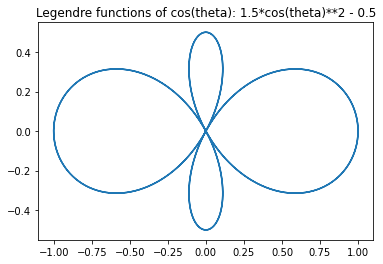

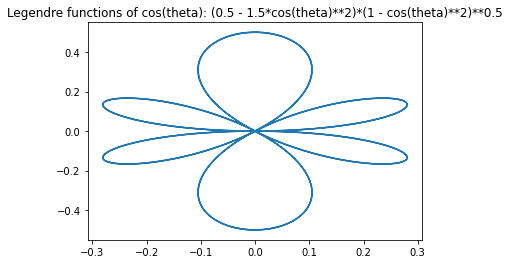

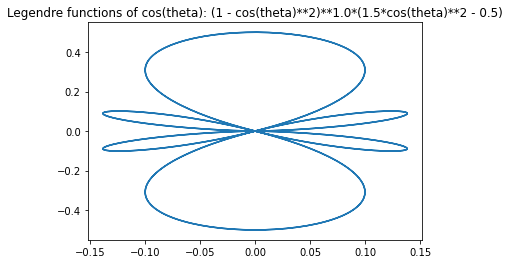

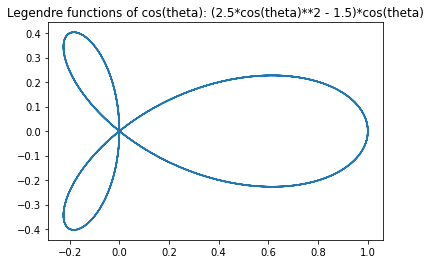

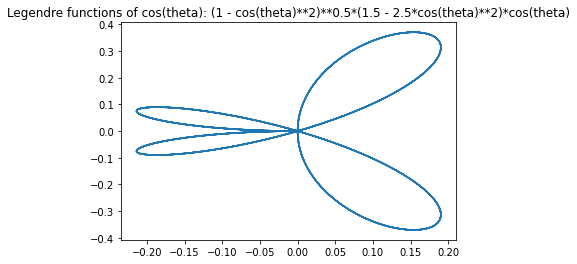

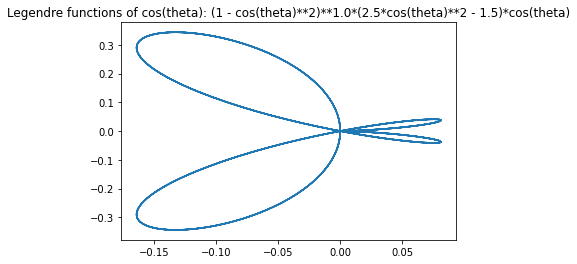

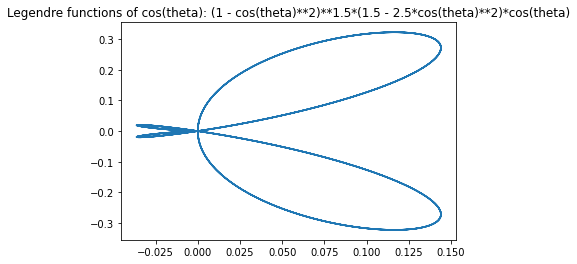

In [ ]:
import numpy as np
from sympy import Symbol, Derivative, simplify, cos
import matplotlib.pyplot as plt

x = Symbol('x')
def legendre_polynomial(l):
  pos_quadratic_expr = (x**2 - 1)**l
  pos_quadratic_diff_expr = Derivative(pos_quadratic_expr, x, l)
  legendre_poly_expression = (1/((2**l)*np.math.factorial(l))) * pos_quadratic_diff_expr.doit()
  print(f"Legendre Polynomial Expression : {legendre_poly_expression}")
  return simplify(legendre_poly_expression)

def legendre_function(l, m, legendre_poly_exp):
  def negative_one_to_pow(m):
    sign = 1
    for i in range(m):
      sign *= -1
    return sign
  sign = negative_one_to_pow(m)
  print(f"Sign at m = {m} was: {sign}")
  neg_quadratic_expr = (1 - x**2)**(m/2)
  legendre_poly_diff_expr = Derivative(legendre_poly_exp, x, m)
  legendre_function_expression = sign*neg_quadratic_expr*legendre_poly_exp.doit()
  print(f"Legendre Function Expression : {legendre_function_expression}\n")
  return simplify(legendre_function_expression)

l_0 = 0
l = [1,2,3]
dm = 1
m_0 = 0
m_1 = np.arange(0,l[0] + 1,dm) #m_1 = np.arange(-l[0],l[0],1) ???
m_2 = np.arange(0,l[1] + 1,dm) #m_2 = np.arange(-l[1],l[1],1) ???
m_3 = np.arange(0,l[2] + 1,dm)
m = [m_1, m_2, m_3]
print(f"m for l = 0: {m_0}")
print(f"m for l = 1: {m_1}")
print(f"m for l = 2: {m_2}\n")

# For l = 0:
print(f"@ l = {l_0}")
legendre_polynomial_expression = legendre_polynomial(l_0)
legendre_function_l_zero = legendre_function(l_0, m_0, legendre_polynomial_expression)

# For l > 0:
legendre_functions = []
for i in range(len(l)):
  for j in range(len(m[i])):
      print(f"@ l = {l[i]}")
      print(f"@ m[{i}][{j}] = {m[i][j]}")
      legendre_polynomial_expr = legendre_polynomial(l[i])
      legendre_functions.append(legendre_function(l[i],m[i][j],legendre_polynomial_expr))

# Interval Length, Domain, Radius Length
dx = 0.01
lfunc_domain = np.arange(-1,1, dx)
graph_domain = np.arange(-2*np.pi, 2*np.pi, dx)
r = 1
theta = Symbol("theta")

# Substituting Cosine of Theta into Legendre Functions
legendre_function_cos = []
for i in range(len(legendre_functions)):
  legendre_function_cos = np.append(legendre_function_cos, legendre_functions[i].subs(x, cos(theta)))
  print(f"Legendre functions with cos(theta): {legendre_function_cos[i]}")
print("\n")

# Creating all of the Legendre Functions and plotting them in x - y space
fig, ax = plt.subplots(figsize=(10,8))
for i in range(len(legendre_functions)):
  y_space = np.array([])
  for j in range(len(lfunc_domain)):
    y_space = np.append(y_space, legendre_functions[i].subs(x, lfunc_domain[j]))
  print(f"Legendre functions: {legendre_functions[i]}")
  plt.plot(lfunc_domain,y_space, label=f"{legendre_functions[i]}")
  plt.legend()
print("\n")

# The Legendre Function graphs in z - theta space
for i in range(len(legendre_function_cos)):
  fig, ax = plt.subplots()
  yt_space = np.array([])
  for j in range(len(graph_domain)):
    yt_space = np.append(yt_space, legendre_function_cos[i].subs(theta, graph_domain[j]))
  print(f"Legendre functions of cos(theta): {legendre_function_cos[i]}")

  y1 = []
  y2 = []
  for k in range(len(yt_space)):
    y1.append(yt_space[k]*np.cos(float(graph_domain[k])))
    y2.append(yt_space[k]*np.sin(float(graph_domain[k])))
  plt.plot(y1,y2)
  plt.title(f"Legendre functions of cos(theta): {legendre_function_cos[i]}")

Notes on Program: Integrate negative m values with:

$Y_{ℓ}^{-m} = (-1)^m (Y_{ℓ}^{m})^*$